37 0
42 1
55 2
56 2
65 3
66 3
76 4
77 4
86 5
87 5
99 6
100 6
111 7
112 7
122 8
123 8
132 9
133 9
143 10
144 10
154 11
155 11
166 12
167 12
178 13
179 13


C:\Users\hhz20\AppData\Local\Temp/ipykernel_7260/239375551.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][i] += 1
C:\Users\hhz20\AppData\Local\Temp/ipykernel_7260/239375551.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j+1] -= 1


191 14
192 14


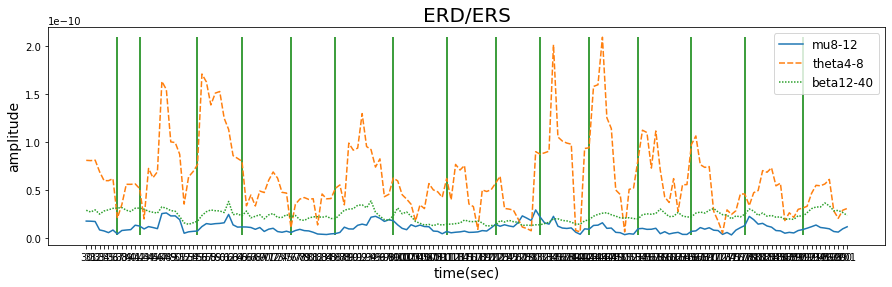

In [4]:
## 주석 부분은 범위 바꿔주고 싶을 때 바꾸면 되는 부분.

import pandas as pd
from datetime import datetime

#  FP1 파일load
fp1_file_name = '2022-06-11_오후 4_21'
click_file_name = '2022-6-11 16.22'

all_df_ratio = pd.DataFrame(columns=['ratio_mu','ratio_theta','ratio_beta','ClickorNot']) # 빈 테이터프레임 생성

# Fp1_FFT 파일 불러오기
df = pd.read_table('C:/BCI Data/혜진/'+fp1_file_name+'/Fp1_FFT.txt',sep='\t',encoding = 'cp949')
#  clicktime 파일load
f = open("C:/BCI Data/혜진_click/"+click_file_name+".txt", "r")

# 보고싶은 주파수 컬럼 만들어주기.
df['mu8-12'] = 0
df['theta4-8'] = 0
df['beta12-40'] = 0


# 해당 주파수 진폭 모아주기 # 이것도 수정 -11
for i in range(1,len(df.columns)-4): # df.columns[i][:-2] -> 헤르츠 정보
    # 마지막 컬럼 세개가 mu,theta,beta 여서 그거 제외한거(-4)
    
    if float(df.columns[i][:-2])>=8 and float(df.columns[i][:-2])<12 : # 뮤파
        df['mu8-12'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=4 and float(df.columns[i][:-2])<8: # 세타파
        df['theta4-8'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=12 and float(df.columns[i][:-2])<40: # 베타파
        df['beta12-40'] += df[df.columns[i]]

# ClickTime 파일 불러와서 배열에 저장.
# click time 시간포맷 변경해서 리스트에 넣기 오후 ㅁ:ㅁㅁ:ㅁㅁ
# f = open("C:/Users/SW/gazetracker/src/2022-6-10 19.25.txt", "r")
# f = open("C:/Users/SW/BCI Data/혜진_click/2022-6-4 17.52.txt", "r")

click_time = []
while True:
    line = f.readline().strip()
    if not line: break
    click_time.append(line)

click_time_reformat = []
for i in range(len(click_time)):
    times = datetime.strptime(click_time[i][:-7],"%Y-%m-%d %H:%M:%S")
    if int(times.strftime("%H"))>12 :
        h = int(times.strftime("%H"))-12
        time_new =times.strftime("오후 "+ str(h)+":%M:%S")
        click_time_reformat.append(time_new)
    else:
        time_new =times.strftime("오전 %H:%M:%S")
        click_time_reformat.append(time_new)
        

# click에 시간차 0초 1초 인걸로 클릭 타이밍 1로 만들어주기.
df['click'] = 0
df['Time']
for i in range(0,len(df)) : # 뇌파기기에서 찍힌 시간
    df['Time'][i].split('.')
    time_1 = datetime.strptime(df['Time'][i].split('.')[0][3:],"%H:%M:%S") # 10이랑 11 조정해줘야함.
    for j in range(0, len(click_time)): # 클릭버튼 눌러서 찍힌 시간
        time_2 = datetime.strptime(click_time_reformat[j][3:],"%H:%M:%S")
        time_interval = time_2 - time_1
        if str(time_interval) == '0:00:00' or str(time_interval) == '0:00:01':
            print(i,j)
            df['click'][i] += 1
            break
            
# 중복된 click time 제거해주기 (3개까지 동시에 나오는 경우가 있어서 그거 제거 해줌)
for j in range(0,len(df)) : 
    if df['click'][j] == 1:
        if df['click'][j+1] == 1:
            df['click'][j+1] -= 1
            if df['click'][j+2] == 1:
                df['click'][j+2] -= 1
            
df_muthetabeta = df[df.columns[-4:]]            

# 그래프 그리기     
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))

# Line graph by seaborn
# df_=df[['mu8-12','theta4-8','beta12-40']]
df_=df[['mu8-12','theta4-8','beta12-40']]
ax = sns.lineplot(data=df_[30:len(df)])
# ax = sns.lineplot(data=df[df.columns['mu8-12','beta12-16']][60:205])
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])
plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(30, len(df), 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(30,len(df)) :
# for i in range(50,len(df)) :
    if df['click'][i] ==1 :
#         min(df['mu8-12'][60:205]),max(df['mu8-12'][60:205])
        min_ = [min(df_[df_.columns[0]][30:]),min(df_[df_.columns[1]][30:]),min(df_[df_.columns[2]][30:])]
        max_ = [max(df_[df_.columns[0]][30:]),max(df_[df_.columns[1]][30:]), max(df_[df_.columns[2]][30:])]
#         min_ = [min(df['beta36-40'][60:205])]
#         max_ = [max(df['beta36-40'][60:205])]
#         min_ = [min(df['mu8-12'][50:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
plt.show()     

In [5]:
# # click 시점의 행넘버 리스트에 넣어주기
click_row_num = [] # click 시점의 행넘버
for k in range(len(df)) : 
    if df['click'][k] == 1: # click 시점의 행넘버 구하기
        click_row_num.append(k)
click_row_num.pop(0) # 첫번째는 ref를 잘 측정할 수 없어서 제외하고 시작.         
print(click_row_num)    

# 빈 데이터프레임 생성.
df_ratio = pd.DataFrame(columns=['ratio_mu','ratio_theta','ratio_beta','ClickorNot'])
# 첫 클릭시점부터 마지막 클릭시점 이후 3초까지 루프 돌면서 증감율 구하기. 0123(클릭)4
for i in range(click_row_num[0]-2, click_row_num[13]+1):
    ClickorNot = 0    
    if i+2 in click_row_num :
        ClickorNot = 1
    ref_mu = df_muthetabeta[i:i+2].mean()[0]
    after_mu = df_muthetabeta[i+2:i+4].mean()[0]
    ratio_mu = (after_mu-ref_mu)/ref_mu
    
    ref_theta = df_muthetabeta[i:i+2].mean()[1] # 앞에 3초 데이터
    after_theta = df_muthetabeta[i+2:i+4].mean()[1]# 클릭 포함 데이터 
    ratio_theta = (after_theta-ref_theta)/ref_theta
    
    ref_beta = df_muthetabeta[i:i+2].mean()[2] # 앞에 3초 데이터
    after_beta = df_muthetabeta[i+2:i+4].mean()[2] # 클릭 포함 데이터 
    ratio_beta = (after_beta-ref_beta)/ref_beta
    
    df_ratio.loc[i+2]=[ratio_mu,ratio_theta,ratio_beta,ClickorNot]

# all_df_ratio는 전체 데이터셋임. 세션마다의 ratio는 df_ratio. 이 전체 세션의 df_ratio를 모두 모은게 all_df_ratio.
# all_df_ratio = df_ratio
all_df_ratio = all_df_ratio.append(df_ratio)

# df_ratio.to_excel('C:/BCI Data/ratio file/'+fp1_file_name+'_ratio.xlsx')

[42, 55, 65, 76, 86, 99, 111, 122, 132, 143, 154, 166, 178, 191]


In [6]:
all_df_ratio

,ratio_mu,ratio_theta,ratio_beta,ClickorNot
42,-0.006388,-0.362847,0.042609,1.0
43,-0.169567,-0.142810,-0.068670,0.0
44,0.040048,0.888986,-0.105874,0.0
45,-0.030336,0.425510,-0.087216,0.0
46,0.530208,0.713511,0.067586,0.0
...,...,...,...,...
189,0.188417,0.154645,0.087172,0.0
190,0.460037,0.275344,0.160556,0.0
191,0.434199,0.247236,0.139316,1.0
192,0.317325,0.300298,0.243176,0.0


In [79]:
all_df_ratio.to_excel('C:/BCI Data/ratio file/혜진_all_ratio.xlsx')